In [191]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

### data import

In [192]:
def concat_dfs(directory):
    files = glob.glob(directory)
    df = []

    for f in files:   
        col_name = f.split('/')[-1].split('.')[0]
        csv = pd.read_excel(f, names = [col_name], keep_default_na=False)
        csv.reset_index(drop=True, inplace=True)
        df.append(csv)
    
    df2 = pd.concat(df,axis=1)
    return df2.reindex(sorted(df2.columns), axis=1)

In [193]:
living_trees = concat_dfs(r'./data/zywe_drzewa_tabele/*.xls').drop(columns = ['1992', '2003', '2013', '2014'])
living_trees.head()

,2015,2016,2017,2018,2019,2020,2021,2022
0,73.630776,40.733856,55.765217,47.733899,44.712683,68.068858,80.617433,144.036001
1,65.993944,30.052517,59.066688,37.764794,34.545800,73.079181,81.094321,144.094686
2,72.406274,41.399081,51.507782,47.882672,45.013870,63.563303,76.801352,140.200566
3,68.192390,36.628407,50.885907,43.172182,40.277521,63.796179,75.171119,138.578350
4,70.552659,40.196859,49.551987,46.470704,43.663515,61.804577,74.710270,138.115829


In [194]:
dead_trees = concat_dfs(r'./data/martwe_drzewa_tabele/*.xls').drop(columns = ['1993_2003', '2004_2013', '2014'])
dead_trees.head()

,2015,2016,2017,2018,2019,2020,2021,2022
0,3.286743,49.691393,66.533088,62.467834,48.611588,98.525047,124.008671,124.008671
1,2.973508,14.507769,68.030387,70.373049,62.979225,30.179306,109.206454,109.206454
2,4.581918,66.890127,72.418628,65.443224,31.186597,40.847911,113.883070,113.883070
3,2.167089,62.034711,84.857739,19.298963,6.001604,72.520293,111.021580,111.021580
4,6.149053,58.897383,57.784577,48.774192,19.739388,30.088921,17.182465,17.182465


### preview of feature structure

Text(0.5, 0, 'Rok')

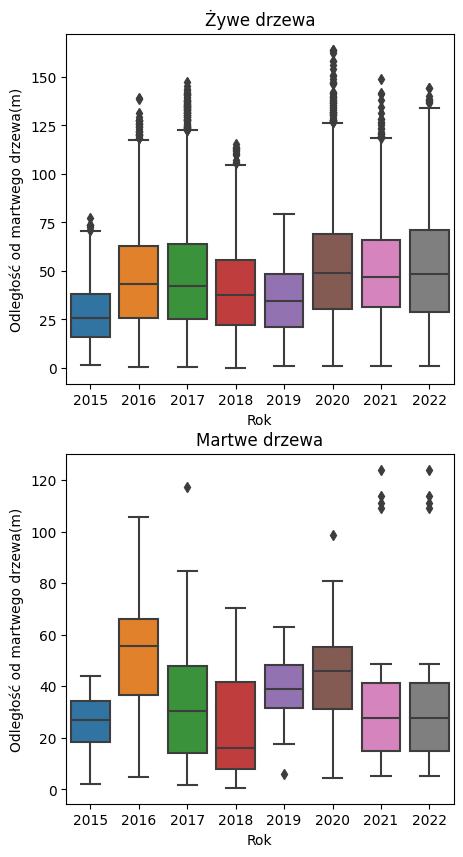

In [195]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))

sns.boxplot(living_trees, ax=ax[0])

ax[0].set(title='Żywe drzewa')
ax[0].set_ylabel("Odległość od martwego drzewa(m)")
ax[0].set_xlabel("Rok")

sns.boxplot(dead_trees, ax=ax[1])

ax[1].set(title='Martwe drzewa')
ax[1].set_ylabel("Odległość od martwego drzewa(m)")
ax[1].set_xlabel("Rok")

### analysis of stand dieback periods

In [196]:
living_2015_2018 = pd.melt(living_trees[['2015', '2016', '2017', '2018']]).dropna()['value']
living_2019_2022 = pd.melt(living_trees[['2019', '2020', '2021', '2022']]).dropna()['value']
living_2015_2022 = pd.melt(living_trees[['2015', '2016', '2017', '2018' ,'2019', '2020', '2021', '2022']]).dropna()['value']

dead_2015_2018 = pd.melt(dead_trees[['2015', '2016', '2017', '2018']]).dropna()['value']
dead_2019_2022 = pd.melt(dead_trees[['2019', '2020', '2021', '2022']]).dropna()['value']
dead_2015_2022 = pd.melt(dead_trees[['2015', '2016', '2017', '2018' ,'2019', '2020', '2021', '2022']]).dropna()['value']

#### 2015-2018

In [197]:
ks_2015_2018 = ks_2samp(living_2015_2018, dead_2015_2018)
ks_2015_2018

KstestResult(statistic=0.09165512767395713, pvalue=0.004064755536857501)

#### 2019-2022

In [198]:
ks_2019_2022 = ks_2samp(living_2019_2022, dead_2019_2022)
ks_2019_2022

KstestResult(statistic=0.22067563690473296, pvalue=2.4562131770261772e-05)

#### 2015-2022

In [199]:
ks_2015_2022 = ks_2samp(living_2015_2022, dead_2015_2022)
ks_2015_2022

KstestResult(statistic=0.13236046455755957, pvalue=8.274596171969687e-08)

KstestResult

In [200]:
summary_table = pd.DataFrame({
    '2015 - 2018': ks_2015_2018[1], 
    '2019 - 2022': ks_2019_2022[1], 
    '2015 - 2022': '< 0.000001', 
}, index = ['p-value'])

summary_table = summary_table.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
summary_table.set_properties(**{'text-align': 'center'})

summary_table

,2015 - 2018,2019 - 2022,2015 - 2022
p-value,0.004065,0.000025,< 0.000001


## Chart

In [201]:
# living trees

living_2015_2018_df = living_2015_2018.to_frame(name = 'value')
living_2019_2022_df = living_2019_2022.to_frame(name = 'value')
living_2015_2022_df = living_2015_2022.to_frame(name = 'value')

living_2015_2018_df['variable'] = 'żywe 2015-2018'
living_2019_2022_df['variable'] = 'żywe 2019-2022'
living_2015_2022_df['variable'] = 'żywe 2015-2022'

# dead trees

dead_2015_2018_df = dead_2015_2018.to_frame(name = 'value')
dead_2019_2022_df = dead_2019_2022.to_frame(name = 'value')
dead_2015_2022_df = dead_2015_2022.to_frame(name = 'value')

dead_2015_2018_df['variable'] = 'martwe 2015-2018'
dead_2019_2022_df['variable'] = 'martwe 2019-2022'
dead_2015_2022_df['variable'] = 'martwe 2015-2022'

In [202]:
chart_df = pd.concat([living_2015_2018_df, living_2019_2022_df, living_2015_2022_df,
                     dead_2015_2018_df, dead_2019_2022_df, dead_2015_2022_df], axis = 0).reset_index(drop = True)
chart_df.head()

,value,variable
0,73.630776,żywe 2015-2018
1,65.993944,żywe 2015-2018
2,72.406274,żywe 2015-2018
3,68.192390,żywe 2015-2018
4,70.552659,żywe 2015-2018


[Text(0.5, 0, '')]

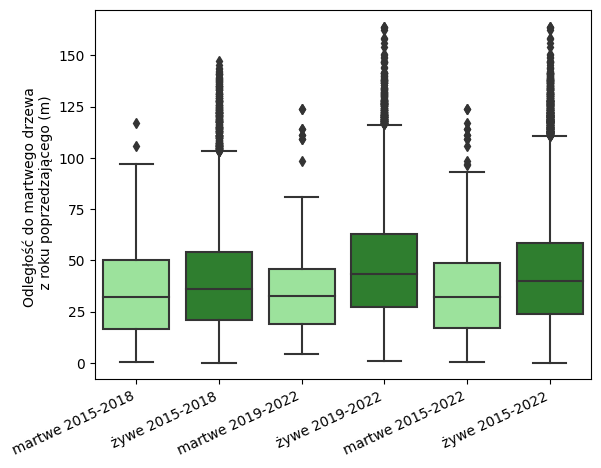

In [203]:
order = ['martwe 2015-2018', 'żywe 2015-2018', 
         'martwe 2019-2022', 'żywe 2019-2022',
         'martwe 2015-2022', 'żywe 2015-2022']

my_pal = {
    'martwe 2015-2018': 'lightgreen',
    'martwe 2019-2022': 'lightgreen', 
    'martwe 2015-2022': 'lightgreen',
    'żywe 2015-2018': 'forestgreen',
    'żywe 2019-2022': 'forestgreen', 
    'żywe 2015-2022': 'forestgreen'
         }

ax = sns.boxplot(data=chart_df, x = "variable", y = "value", order = order, palette = my_pal)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 25, ha="right")
ax.set_ylabel("Odległość do martwego drzewa \n z roku poprzedzającego (m)")
ax.set(xlabel=None)

### descriptive statistics

##### for each year

In [204]:
stats_living = living_trees.agg(['mean', 'median', 'std'])
stats_living

,2015,2016,2017,2018,2019,2020,2021,2022
mean,27.602806,46.466949,48.214450,39.745017,35.464734,53.076511,49.921382,52.738538
median,25.808825,43.499458,42.468914,37.808357,34.388266,48.989883,47.025173,48.455152
std,14.754850,26.264887,30.769414,21.913326,17.741348,30.998692,25.491286,30.631906


In [205]:
stats_dead = dead_trees.agg(['mean', 'median', 'std'])
stats_dead

,2015,2016,2017,2018,2019,2020,2021,2022
mean,25.482608,52.499921,34.680072,24.782015,39.767739,46.546101,35.502651,35.502651
median,26.761868,55.720141,30.295842,16.218383,38.831312,46.087736,27.577149,27.577149
std,11.061347,22.025030,23.734072,20.628702,14.767020,22.889988,31.230107,31.230107


In [206]:
stats_summary = stats_living - stats_dead
stats_summary

,2015,2016,2017,2018,2019,2020,2021,2022
mean,2.120198,-6.032973,13.534378,14.963002,-4.303005,6.530410,14.418731,17.235886
median,-0.953043,-12.220683,12.173071,21.589974,-4.443045,2.902147,19.448024,20.878003
std,3.693504,4.239857,7.035342,1.284625,2.974328,8.108704,-5.738821,-0.598201


###### for groups of trees

In [207]:
stats_groups = chart_df.pivot(columns = 'variable').agg(['mean', 'median', 'std']).droplevel(0, axis=1)
stats_groups.columns.name=''
stats_groups = stats_groups.rename(index={'mean': 'średnia', 'median': 'mediana', 'std' : 'sd'})

stats_groups2 = stats_groups.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
stats_groups2.set_properties(**{'text-align': 'center'})

stats_groups2

,martwe 2015-2018,martwe 2015-2022,martwe 2019-2022,żywe 2015-2018,żywe 2015-2022,żywe 2019-2022
średnia,35.087198,35.888025,38.527271,40.309475,43.869893,47.724591
mediana,31.942137,32.164828,32.404193,36.219238,39.724653,43.513663
sd,22.598794,23.775146,27.238582,25.408481,26.779788,27.679107


In [208]:
stats_groups

,martwe 2015-2018,martwe 2015-2022,martwe 2019-2022,żywe 2015-2018,żywe 2015-2022,żywe 2019-2022
średnia,35.087198,35.888025,38.527271,40.309475,43.869893,47.724591
mediana,31.942137,32.164828,32.404193,36.219238,39.724653,43.513663
sd,22.598794,23.775146,27.238582,25.408481,26.779788,27.679107


In [209]:
stats_summary = pd.DataFrame({
    '2015-2018' : stats_groups.iloc[:, 3] - stats_groups.iloc[:, 0],
    '2015-2022' : stats_groups.iloc[:, 4] - stats_groups.iloc[:, 1],
    '2019-2022' : stats_groups.iloc[:, 5] - stats_groups.iloc[:, 2]
}).rename(index={'mean': 'średnia', 'median': 'mediana', 'std' : 'sd'})

stats_summary = stats_summary.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
stats_summary.set_properties(**{'text-align': 'center'})

stats_summary

,2015-2018,2015-2022,2019-2022
średnia,5.222277,7.981868,9.197319
mediana,4.277100,7.559826,11.109470
sd,2.809687,3.004642,0.440525
